In [109]:
from tensorflow.keras import callbacks
import matplotlib.pyplot as pyplot
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, train_test_split;
import numpy;
import os
import pandas;
from sklearn.pipeline import Pipeline
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier;
import seaborn
import sys;
from keras.utils import to_categorical;
# REMOTE_MODULE_PATH = '/home/macbookretina/automatic-music-genre-classification/feature_extraction_deep_learning'
LOCAL_MODULE_PATH = '/Users/macbookretina/Desktop/automatic-music-genre-classification/feature_extraction_deep_learning'
sys.path.insert(1, LOCAL_MODULE_PATH)
from custom_module.utilities import *

In [57]:
features = pandas.read_csv(LOCAL_MOUNTED_DATASET_PATH + '/data/cleaned_features.csv', index_col=0)
features

,genre_label,lpc_1,lpc_2,lpc_3,lpc_4,mean_beats,mean_beats_timestamp,mean_db4_cA4,mean_db4_cD1,mean_db4_cD2,...,var_spec_centroid,var_spec_contrast_1,var_spec_contrast_2,var_spec_contrast_3,var_spec_contrast_4,var_spec_contrast_5,var_spec_contrast_6,var_spec_contrast_7,var_spec_rolloff,var_zcr
0,1,1.0,-1.178271,0.647402,-0.352129,649.120690,15.072553,-0.070889,2.706283e-09,-1.245192e-04,...,4.185230e+05,17.861575,21.121083,25.873245,13.038216,6.962883,7.988678,14.555389,1.564158e+06,0.002891
1,1,1.0,-1.086489,0.542333,-0.396561,617.465116,14.337512,-0.000740,8.956381e-06,-9.212386e-05,...,9.392262e+05,29.258739,24.407069,23.032866,18.185633,12.981837,12.461155,107.433159,2.076888e+06,0.005135
2,1,1.0,-1.365355,0.560194,-0.172092,631.428571,14.661743,-0.011143,-1.990486e-09,-7.116798e-06,...,6.335591e+05,14.853086,20.595163,23.554291,21.775710,11.043003,11.478725,17.035474,3.405313e+06,0.002481
3,1,1.0,-1.240807,0.505005,-0.190461,619.227273,14.378429,-0.002008,3.508618e-05,-2.028877e-05,...,4.953543e+05,25.631542,17.320487,26.199990,13.617381,7.566584,8.344646,142.327995,1.811020e+06,0.002283
4,1,1.0,-0.962111,0.201135,-0.206167,631.382979,14.660684,-0.001342,3.828920e-05,-4.344582e-05,...,1.073302e+06,35.138048,34.537389,32.614328,30.967176,19.603025,10.813280,102.154238,4.354818e+06,0.006124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,1,1.0,-1.878301,1.492194,-0.602686,1246.841270,14.475799,0.000255,-3.682523e-07,1.021450e-05,...,6.717626e+05,25.312044,16.848874,13.235958,17.875383,10.292653,7.975512,70.855880,3.494444e+06,0.001376
3295,1,1.0,-0.757695,0.322183,-0.531011,1269.770833,14.742011,0.000069,-3.853609e-07,3.565250e-05,...,9.118337e+06,36.373645,31.511738,26.118394,30.467805,48.009289,32.720426,98.557969,2.956056e+07,0.007543
3296,3,1.0,-1.862517,1.301521,-0.433298,1254.981818,14.570310,0.000784,-1.326012e-06,6.062675e-07,...,9.370093e+05,47.880472,15.887094,19.648933,20.805391,14.361217,9.615398,48.662283,6.126479e+06,0.000358
3297,3,1.0,-1.882439,1.470879,-0.573606,1272.877551,14.778080,-0.000206,-3.779051e-07,2.349206e-05,...,1.390328e+06,32.331749,18.345547,18.593669,21.698056,14.748304,8.958216,19.165002,5.990872e+06,0.001409


In [58]:
y = features.loc[:,'genre_label']
X = features.loc[:, features.columns.difference(['genre_label'])]
X

,lpc_1,lpc_2,lpc_3,lpc_4,mean_beats,mean_beats_timestamp,mean_db4_cA4,mean_db4_cD1,mean_db4_cD2,mean_db4_cD3,...,var_spec_centroid,var_spec_contrast_1,var_spec_contrast_2,var_spec_contrast_3,var_spec_contrast_4,var_spec_contrast_5,var_spec_contrast_6,var_spec_contrast_7,var_spec_rolloff,var_zcr
0,1.0,-1.178271,0.647402,-0.352129,649.120690,15.072553,-0.070889,2.706283e-09,-1.245192e-04,-0.000069,...,4.185230e+05,17.861575,21.121083,25.873245,13.038216,6.962883,7.988678,14.555389,1.564158e+06,0.002891
1,1.0,-1.086489,0.542333,-0.396561,617.465116,14.337512,-0.000740,8.956381e-06,-9.212386e-05,0.000984,...,9.392262e+05,29.258739,24.407069,23.032866,18.185633,12.981837,12.461155,107.433159,2.076888e+06,0.005135
2,1.0,-1.365355,0.560194,-0.172092,631.428571,14.661743,-0.011143,-1.990486e-09,-7.116798e-06,0.000019,...,6.335591e+05,14.853086,20.595163,23.554291,21.775710,11.043003,11.478725,17.035474,3.405313e+06,0.002481
3,1.0,-1.240807,0.505005,-0.190461,619.227273,14.378429,-0.002008,3.508618e-05,-2.028877e-05,-0.001993,...,4.953543e+05,25.631542,17.320487,26.199990,13.617381,7.566584,8.344646,142.327995,1.811020e+06,0.002283
4,1.0,-0.962111,0.201135,-0.206167,631.382979,14.660684,-0.001342,3.828920e-05,-4.344582e-05,0.000076,...,1.073302e+06,35.138048,34.537389,32.614328,30.967176,19.603025,10.813280,102.154238,4.354818e+06,0.006124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,1.0,-1.878301,1.492194,-0.602686,1246.841270,14.475799,0.000255,-3.682523e-07,1.021450e-05,-0.000065,...,6.717626e+05,25.312044,16.848874,13.235958,17.875383,10.292653,7.975512,70.855880,3.494444e+06,0.001376
3295,1.0,-0.757695,0.322183,-0.531011,1269.770833,14.742011,0.000069,-3.853609e-07,3.565250e-05,-0.000009,...,9.118337e+06,36.373645,31.511738,26.118394,30.467805,48.009289,32.720426,98.557969,2.956056e+07,0.007543
3296,1.0,-1.862517,1.301521,-0.433298,1254.981818,14.570310,0.000784,-1.326012e-06,6.062675e-07,-0.000024,...,9.370093e+05,47.880472,15.887094,19.648933,20.805391,14.361217,9.615398,48.662283,6.126479e+06,0.000358
3297,1.0,-1.882439,1.470879,-0.573606,1272.877551,14.778080,-0.000206,-3.779051e-07,2.349206e-05,-0.000132,...,1.390328e+06,32.331749,18.345547,18.593669,21.698056,14.748304,8.958216,19.165002,5.990872e+06,0.001409


In [59]:
y.value_counts(normalize=True)

3    0.333434
1    0.333434
2    0.333131
Name: genre_label, dtype: float64

In [60]:
predictors_all_label = X.columns.values

In [61]:
preprocess_np = normalization_pipeline(
    predictors_all_label)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2639, 217), (660, 217), (2639,), (660,))

In [63]:
pipeline_estimator = normalization_pipeline(
    predictors_all_label).fit(X_train)
X_train = pipeline_estimator.transform(X_train)
X_test = pipeline_estimator.transform(X_test)
X_train.shape, X_test.shape

((2639, 217, 1), (660, 217, 1))

In [64]:
_, ncols, _ = X_test.shape

In [65]:
# one hot encoding our labels
y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)

In [66]:
y_train.shape, y_test.shape

((2639, 4), (660, 4))

In [67]:
# set log directory for tensorboard logs
root_logdir = os.path.join(os.curdir, "my_logs")

In [68]:
def get_run_logdir(): 
    '''
    get_run_logdir() generates subdirectory path with
    current date & time.
    '''   
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S") 
    return os.path.join(root_logdir, run_id)

In [69]:
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_01_16-11_28_43'

In [70]:
# define tensorbaord callback
tensorboard_cb = callbacks.TensorBoard(run_logdir) 

In [71]:
# define earlt stopping callback
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                        restore_best_weights=True)

In [72]:
best_model_params = {
    'activation': 'relu',
    'dropout': 0.15,
    'filters': 64,
    'kernel_initializer': 'normal',
    'n_hidden': 1,
    'n_neurons': 79,
    'optimizer': 'adam'
}

In [73]:
cnn = set_shape_create_cnn_model('cnn', ncols)(**best_model_params)

Model: "cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 215, 64)           256       
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 107, 64)           0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 105, 128)          24704     
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 52, 128)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6656)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 79)                525903    
_________________________________________________________________
dropout_5 (Dropout)          (None, 79)                0       

In [75]:
history = cnn.fit(X_train, y_train, batch_size=32, epochs=100,
                  validation_data=(X_test, y_test),
                  callbacks=[early_stopping_cb, tensorboard_cb])

Train on 2639 samples, validate on 660 samples
Epoch 1/100
2639/2639 [==============================] - 3s 1ms/sample - loss: 0.9596 - accuracy: 0.5396 - val_loss: 0.8294 - val_accuracy: 0.6152
Epoch 2/100
2639/2639 [==============================] - 2s 600us/sample - loss: 0.7938 - accuracy: 0.6446 - val_loss: 0.7978 - val_accuracy: 0.6470
Epoch 3/100
2639/2639 [==============================] - 2s 632us/sample - loss: 0.7392 - accuracy: 0.6734 - val_loss: 0.7899 - val_accuracy: 0.6348
Epoch 4/100
2639/2639 [==============================] - 2s 597us/sample - loss: 0.7034 - accuracy: 0.6980 - val_loss: 0.7089 - val_accuracy: 0.6939
Epoch 5/100
2639/2639 [==============================] - 2s 763us/sample - loss: 0.6747 - accuracy: 0.7010 - val_loss: 0.7163 - val_accuracy: 0.7000
Epoch 6/100
2639/2639 [==============================] - 2s 850us/sample - loss: 0.6601 - accuracy: 0.7222 - val_loss: 0.7178 - val_accuracy: 0.6773
Epoch 7/100
2639/2639 [==============================] - 2s 8

In [87]:
predicted_y_test = cnn.predict(X_test, verbose=1)

660/660 [==============================] - 0s 225us/sample


In [91]:
predicted_y_test

array([[1.2510762e-04, 2.1574521e-02, 6.6109741e-01, 3.1720296e-01],
       [5.2484415e-07, 2.5223749e-04, 9.9788374e-01, 1.8634629e-03],
       [4.8565307e-05, 4.3787528e-03, 5.8226264e-01, 4.1331002e-01],
       ...,
       [8.0398728e-05, 7.5250240e-03, 6.1729681e-01, 3.7509775e-01],
       [6.0351627e-05, 2.1626091e-02, 7.3743665e-01, 2.4087696e-01],
       [4.5488930e-05, 8.4224147e-01, 9.6709482e-02, 6.1003517e-02]],
      dtype=float32)

In [100]:
GENRES = ['hiphop', 'rock', 'pop']

In [101]:
# check the number of targets per class
for i in range(1,4): 
    print(f'{i} - {GENRES[i-1]}: {sum([1 for target in y_test if target[i] == 1])}')

1 - hiphop: 211
2 - rock: 220
3 - pop: 229


In [102]:
# check the number of predicted values in each class
for i in range(1,4): 
    print(f'{i} - {GENRES[i-1]}: {sum([1 for prediction in predicted_y_test if np.argmax(prediction) == i])}')

1 - hiphop: 235
2 - rock: 202
3 - pop: 223


In [96]:
# calculate the confusion matrix 
# row: actual
# columns: predicted
conf_matrix = confusion_matrix(np.argmax(y_test, 1), np.argmax(predicted_y_test, 1))
conf_matrix

array([[181,   8,  22],
       [ 19, 155,  46],
       [ 35,  39, 155]])

In [98]:
# create a dataframe of the confusion matrix with genre labels for readability 
confusion_df = pandas.DataFrame(conf_matrix)
confusion_df

,0,1,2
0,181,8,22
1,19,155,46
2,35,39,155


In [105]:
GENRES_MAP = {
    0: 'hiphop',
    1: 'rock',
    2: 'pop'
}

In [106]:
# rename rows and columns with genre labels
confusion_df = confusion_df.rename(columns=GENRES_MAP)
confusion_df.index = confusion_df.columns
confusion_df

,hiphop,rock,pop
hiphop,181,8,22
rock,19,155,46
pop,35,39,155


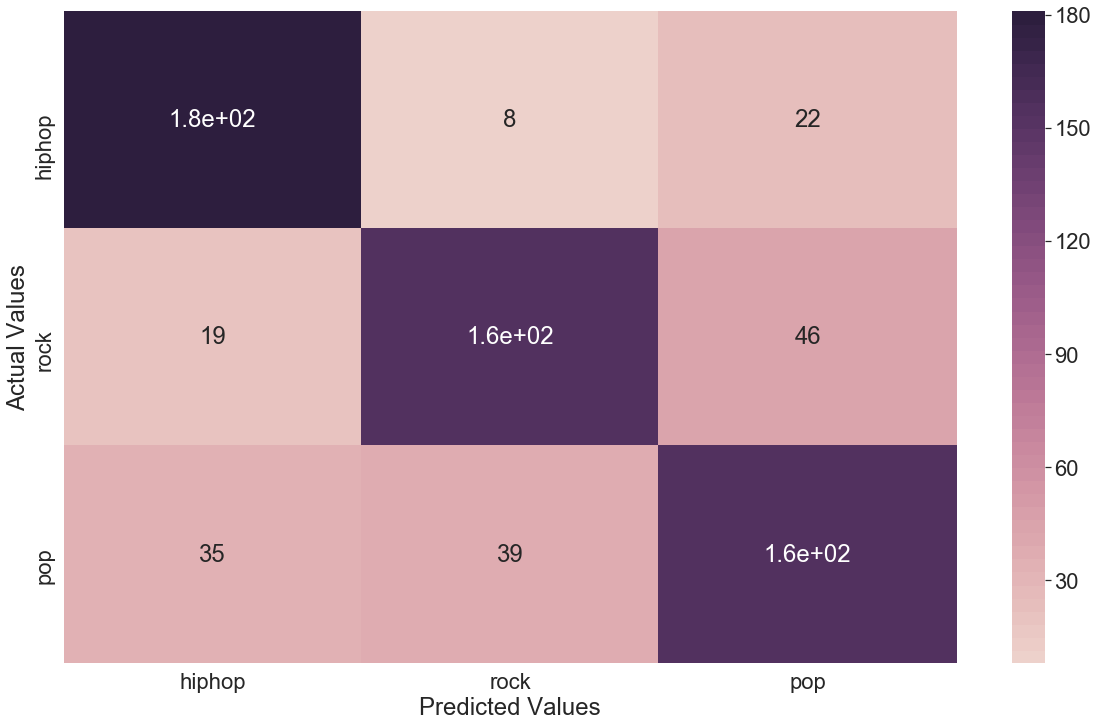

In [112]:
# create a heatmap for the confusion matrix for display
pyplot.figure(figsize= (20,12))
seaborn.set(font_scale = 2);
ax = seaborn.heatmap(confusion_df, annot=True, cmap=seaborn.cubehelix_palette(50));
ax.set(xlabel='Predicted Values', ylabel='Actual Values');

In [113]:
cnn.save('cnn_model.h5')